ETOPO1 available at https://www.ngdc.noaa.gov/mgg/global/relief/ETOPO1/data/bedrock/grid_registered/netcdf/ETOPO1_Bed_g_gmt4.grd.gz


In [2]:
import xarray as xr

#url = 'C:/Users/Mathew.Biddle/Downloads/ETOPO1_Bed_g_gmt4.grd.gz'

url = 'C:/Users/Mathew.Biddle/Downloads/ETOPO1_Bed_g_gmt4.nc'

#url = 'https://www.ngdc.noaa.gov/mgg/global/relief/ETOPO1/thredds/ETOPO1_Bed_g_gmt4.nc'

#url = 'https://www.ngdc.noaa.gov/mgg/global/relief/ETOPO1/data/bedrock/grid_registered/netcdf/ETOPO1_Bed_g_gmt4.grd.gz'

ds = xr.open_dataset(url, engine='netcdf4')

ds

<xarray.Dataset>
Dimensions:  (lon: 21601, lat: 10801)
Coordinates:
  * lon      (lon) float64 -180.0 -180.0 -180.0 -179.9 ... 180.0 180.0 180.0
  * lat      (lat) float64 -90.0 -89.98 -89.97 -89.95 ... 89.95 89.97 89.98 90.0
Data variables:
    z        (lat, lon) float32 ...
Attributes: (12/13)
    Conventions:                CF-1.4
    title:                      ETOPO1_Bed_g.int.grd
    history:                    grdreformat ETOPO1_Bed_g_gmt4.grd ETOPO1_Bed_...
    GMT_version:                4.5.1 [64-bit]
    node_offset:                0
    geospatial_lat_resolution:  0.016667
    ...                         ...
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lon_min:         -180.0
    geospatial_lon_max:         180.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east

In [ ]:
#ds['z'].plot(x='lon',y='lat')

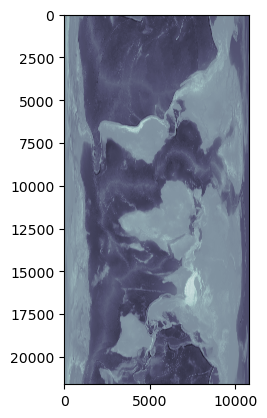

In [7]:
import matplotlib.pyplot as plt

plt.imshow(ds['z'].transpose('lon','lat'),cmap='bone')

In [ ]:
import os

os.listdir('C:/Users/Mathew.Biddle/Downloads')

In [ ]:
import geopandas as gpd

xarr = ds['z']
df = xarr.to_dataframe().reset_index()

gdf = gpd.GeoDataFrame(
    df.z, geometry=gpd.points_from_xy(df.lon,df.lat))

# gdf = gpd.GeoDataFrame(
#     ds, geometry=gpd.points_from_xy(ds.lon, ds.lat),
#     crs="EPSG:4326")